In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as stats
import seaborn as sns

### Problem 1

In [2]:
restitution = np.array([0.6248, 0.6520, 0.6226, 0.6230, 0.6351, 0.6128, 0.6134,0.6368, 0.6280, 0.6131, 0.6275, 0.6403, 0.6310, 0.6118, 0.6220, 0.6096, 0.6223, 0.6261, 0.6521, 0.6065, 0.6159, 0.6151, 0.6300, 0.6297, 0.6262, 0.6049, 0.6214, 0.6298, 0.6121, 0.6107, 0.6435, 0.6262, 0.6170, 0.6141, 0.6192, 0.6548, 0.6392, 0.5978, 0.6314])
restitution.max()

np.float64(0.6548)

#### a) Is there evidence to support the assumption that the coefficient of restitution is normally distributed? 

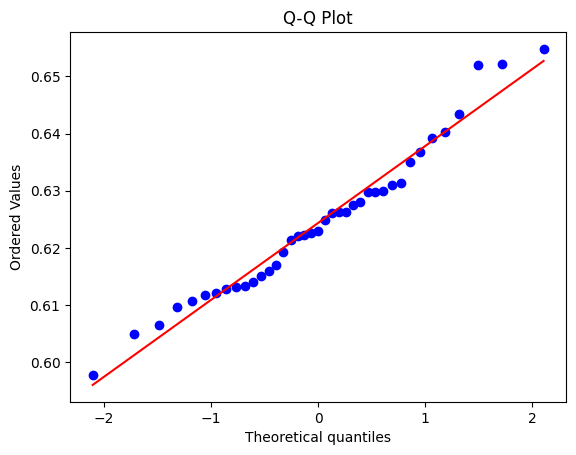

In [3]:

stats.probplot(restitution, dist="norm", plot=plt)

# Show the plot
plt.title("Q-Q Plot")
plt.show()

<Axes: ylabel='Count'>

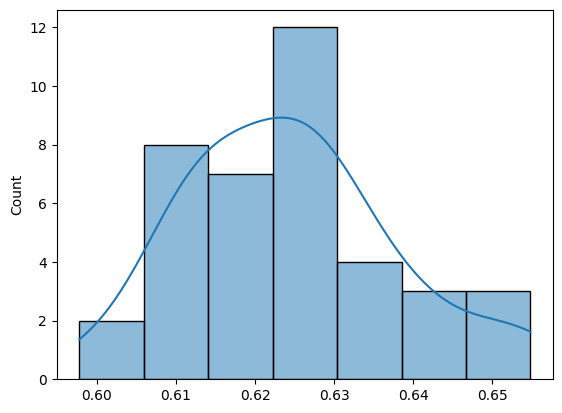

In [4]:
sns.histplot(data=restitution, kde=True)

#### Yes, there is evidence to support the assumption that the coefficient of restitution is normally distributed. The QQplot and KDE are approximately normal

#### (b) Find a 99% CI on the mean coefficient of restitution.

In [5]:
# n = 39, degrees of freedom = 39 - 1 = 38
df = 38
alpha = 0.01  # For 99% confidence, the tail area is 0.01 (since 1% of the probability is split between both tails)

# Find the t-value for the 99% confidence interval
t_value = stats.t.ppf(1 - alpha/2, df)
print(t_value)

2.7115576019130625


In [6]:
sample_mean = restitution.mean()
print('Sample mean is', sample_mean)
sample_std_dev = restitution.std()
print('Sample STD is:', sample_std_dev)
lower_bound = sample_mean - t_value*(sample_std_dev/39**(1/2))
print('Lower bound of the confidence interval is:',  lower_bound)
upper_bound = sample_mean + t_value*(sample_std_dev/39**(1/2))
print('Upper bound of the confidence interval is:',  upper_bound)

Sample mean is 0.6243538461538461
Sample STD is: 0.013058602551257776
Lower bound of the confidence interval is: 0.618683843853236
Upper bound of the confidence interval is: 0.6300238484544562


#### (C) Find the 99% prediction interval on the coefficient of restitution for the next baseball that will be tested. 

In [7]:
lower_bound_PI = sample_mean - t_value*sample_std_dev*((1+(1/39))**(1/2))
print('Lower bound of the prediction interval is:',  lower_bound_PI)
upper_bound_PI = sample_mean + t_value*sample_std_dev*((1+(1/39))**(1/2))
print('Upper bound of the prediction interval is:',  upper_bound_PI)

Lower bound of the prediction interval is: 0.5884936029372009
Upper bound of the prediction interval is: 0.6602140893704914


#### (D) Find an interval that will contain 99% of the values of the coefficient of restitution with 95% confidence

In [8]:
#This appears to be a tolerance interval problem...
k = 3.129 #given that gamma = 0.99, n = 39, with 95% confidence
lower_bound = sample_mean - k*sample_std_dev
print('Lower bound of the interval is:',  lower_bound)
upper_bound = sample_mean + k*sample_std_dev
print('Upper bound of the interval is:',  upper_bound)

Lower bound of the interval is: 0.5834934787709606
Upper bound of the interval is: 0.6652142135367317


### (e) Explain the Difference in the three intervals computed in (b), (c), and (d)

##### (b) we were computing the confidence interval on the mean, which is a range of plausible values for the population mean given a sample mean. For (c), we were computing the prediciton interval, which is the range of future plausible observations of coefficient of restitutions. In (d), we were computing the tolerance interval, which is the range that contains the specific portion of the population (99%) that fall within the given confidence interval. 

In [9]:
print(restitution.min())
print(restitution.max())

0.5978
0.6548


## Problem (2)

#### (A) What Sample size would you reccomend? 

In [15]:
std = 8 
std_new = 6
sample_mean = 5
E= 5
z = 1.96

In [14]:
n = ((z* std)/(E/2))**2
print('Recommended Sample for the new system is:', n)

Recommended Sample for the new system is: 39.337984000000006


#### (B) Find new reccomended sample size given a std of 6 and comment on the difference

In [16]:
n = ((z* std_new)/(E/2))**2
print('New Recommended Sample for the new system is:', n)

New Recommended Sample for the new system is: 22.127615999999996


#### Given the same confidence interval and desired length of the interval, reducing the standard deviation creates a smaller sample size. This makes sense, as to get a range of values for the new mean with 95% confidence, you would need a smaller sample size if the standard deviation is smaller - the data is less spread out. 